In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.multicomp as multi
from dataFilter import Replacing

df = pd.read_excel("C:/Users/Админ/Documents/GitHub/DANO_NN_2024/Data/hakaton_nn_1month.xlsx")

df["education_level_cd"] = df["education_level_cd"].replace("SCH",0)
df["education_level_cd"] = df["education_level_cd"].replace(";",0)
df["education_level_cd"] = df["education_level_cd"].replace("UGR",1)
df["education_level_cd"] = df["education_level_cd"].replace("GRD",2)
df["education_level_cd"] = df["education_level_cd"].replace("PGR",3)
df["education_level_cd"] = df["education_level_cd"].replace("ACD",4)
df["education_level_cd"] = df["education_level_cd"].replace("MGR",5)
df["education_level_cd"] = df["education_level_cd"].replace("AGR",6)
df["education_level_cd"] = df["education_level_cd"].replace("SPC",7)
df["education_level_cd"] = df["education_level_cd"].fillna(1)
df["education_level_cd"] = df["education_level_cd"].astype(int)

df["marital_status_cd"] = df["marital_status_cd"].replace(";",0)
df["marital_status_cd"] = df["marital_status_cd"].replace("MAR",2)
df["marital_status_cd"] = df["marital_status_cd"].replace("DIV",-2)
df["marital_status_cd"] = df["marital_status_cd"].replace("UNM",-1)
df["marital_status_cd"] = df["marital_status_cd"].replace("WID",-1)
df["marital_status_cd"] = df["marital_status_cd"].replace("CIV",1)
df["marital_status_cd"] = df["marital_status_cd"].replace("DLW",0)
df["marital_status_cd"] = df["marital_status_cd"].fillna(0)
df["marital_status_cd"] = df["marital_status_cd"].astype(int)

df["children_cnt"] = df["children_cnt"].fillna(0)
df["children_cnt"] = df["children_cnt"].astype(int)
df["person_monthly_income_amt"] = df["person_monthly_income_amt"].fillna(100)
df["person_monthly_income_amt"] = df["person_monthly_income_amt"].astype(int)

df["day_of_week"] = df["day_of_week"].replace("Понедельник",0)
df["day_of_week"] = df["day_of_week"].replace("Вторник",1)
df["day_of_week"] = df["day_of_week"].replace("Среда",2)
df["day_of_week"] = df["day_of_week"].replace("Четверг",3)
df["day_of_week"] = df["day_of_week"].replace("Пятница",4)
df["day_of_week"] = df["day_of_week"].replace("Суббота",5)
df["day_of_week"] = df["day_of_week"].replace("Воскресенье",6)
df["day_of_week"] = df["day_of_week"].fillna(2)

df["age"] = df["age"].fillna(25)

df["hours"] = list(map(int,[str(i).split(':')[0] for i in df["offencetime"]]))

df["public_holiday"] = df["public_holiday"].replace('t',1)
df["public_holiday"] = df["public_holiday"].replace('f',0)

C:\Users\Админ\AppData\Local\Temp\ipykernel_13360\1323637426.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["day_of_week"] = df["day_of_week"].replace("Воскресенье",6)
C:\Users\Админ\AppData\Local\Temp\ipykernel_13360\1323637426.py:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["public_holiday"] = df["public_holiday"].replace('f',0)


C:\Users\Админ\AppData\Local\Temp\ipykernel_13360\3823249976.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["offenceprob"][i] = len(df["age"][(df["children_cnt"] == df["children_cnt"][i]) & (df["person_monthly_income_amt"] == df["per

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
97302    0.0
97303    0.0
97304    0.0
97305    0.0
97306    0.0
Name: offenceprob, Length: 97307, dtype: float64


<Axes: xlabel='offenceprob', ylabel='Count'>

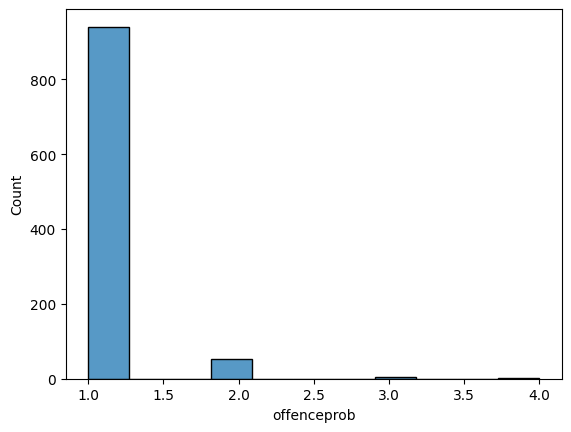

In [5]:
df["offenceprob"] = np.zeros(len(df["children_cnt"]))
for i in range(len(df["children_cnt"][:10000])):
    df["offenceprob"][i] = len(df["age"][(df["children_cnt"] == df["children_cnt"][i]) & (df["person_monthly_income_amt"] == df["person_monthly_income_amt"][i])
                                         & (df["public_holiday"] == df["public_holiday"][i]) & (df["offencetime"]==df["offencetime"][i])])

print(df["offenceprob"])

sns.histplot(df["offenceprob"][:10000])

In [39]:
import statsmodels.api as sm
import datetime as dt
from statsmodels.regression.linear_model import OLS

df["hours"] = list(map(int,[str(i).split(':')[0] for i in df["offencetime"]]))
x1 = df["hours"][:10000]
df["hours"] = df["hours"].fillna(17)
df["public_holiday"] = df["public_holiday"].fillna(0)
x2 = df["public_holiday"][:10000]
df["children_cnt"] = df["children_cnt"].fillna(1)
x3 = df["children_cnt"][:10000]
df["person_monthly_income_amt"] = df["person_monthly_income_amt"].fillna(175)
x4 = df["person_monthly_income_amt"][:10000]
y = df["offenceprob"][:10000]

data = pd.DataFrame({"x1":x1,"x2":x2,"x3":x3,"x4":x4})

X = np.array(data[["x1","x2","x3","x4"]])
Y = np.array(y)
X = sm.add_constant(X,prepend=False)
model = OLS(Y,X)    
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.412
Date:                Sun, 22 Sep 2024   Prob (F-statistic):             0.0475
Time:                        11:20:13   Log-Likelihood:                -166.70
No. Observations:                1000   AIC:                             343.4
Df Residuals:                     995   BIC:                             367.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0012      0.002      0.678      0.4